In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

from pssm_scoring import *


In [2]:
# Read the NLS aligned motifs

file_path ='../data/NLS_sequences_padded.txt'

NLS_sequences = []

with open(file_path, 'r', encoding = 'utf-8') as f:
  for line in f:
    NLS_sequences.append(line.strip())

In [3]:
# Compute the pssm of nuclear localization sequences
fpm = PositionWeightMatrix(NLS_sequences)
fpm.normalize()  
pssm = fpm.log_odds()
print(pssm)

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17
A:  -3.40  -1.20  -1.20  -1.14  -1.16  -1.39  -1.21  -0.31  -0.45  -0.37  -0.98  -0.66  -0.33  -1.97  -0.26  -0.53  -1.36  -0.57
C:  -2.42  -1.83  -1.41  -2.36  -1.59  -0.99  -1.39  -1.66  -1.09  -0.60  -1.17  -1.60   0.26  -0.16  -8.41  -8.31  -8.06  -0.43
D:  -2.00  -3.00  -1.52  -5.08  -0.97  -0.57  -0.88  -0.20  -0.53  -0.77  -1.51  -0.77  -1.13  -0.43  -1.35  -0.48  -2.21   0.51
E:  -2.39  -1.84  -1.08  -0.81  -0.35  -0.38  -0.56  -0.23   0.77   0.74   0.03   0.94  -0.22  -1.21  -1.15  -0.67  -0.95  -0.49
F:  -4.76  -4.18  -1.69  -1.40  -1.37  -2.03  -0.49  -1.03  -0.76  -0.96  -0.22  -2.95  -1.11  -0.26  -1.45  -2.65  -8.06  -0.48
G:  -2.31  -2.03  -0.94  -0.45  -0.79  -0.57  -1.04  -1.07  -0.91  -0.81  -0.31  -0.93  -0.88  -1.80  -0.96   0.14  -1.02  -0.98
H:  -1.63  -0.86  -0.62  -0.64  -0.38  -0.61   0.61   0.30  -1.04  -0.28   0.17  -1.55  -1.08   0

In [4]:
# Plot customized heatmap
def plot_heatmap(pssm, width=10, height=30):
    plt.figure(figsize=(width, height))
    ax = sns.heatmap(pssm, annot=False, cmap='viridis', linewidths=.5,
                    xticklabels=pssm.columns)


    ax.xaxis.tick_top()

    ax.set_xticklabels(pssm.columns, ha="left")
    plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=True)

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Title and labels
    plt.title('PSSM Heatmap', y=1.05)
    plt.xlabel('Amino Acids', labelpad=20)
    plt.ylabel('Position')

    plt.tight_layout()

    plt.show()

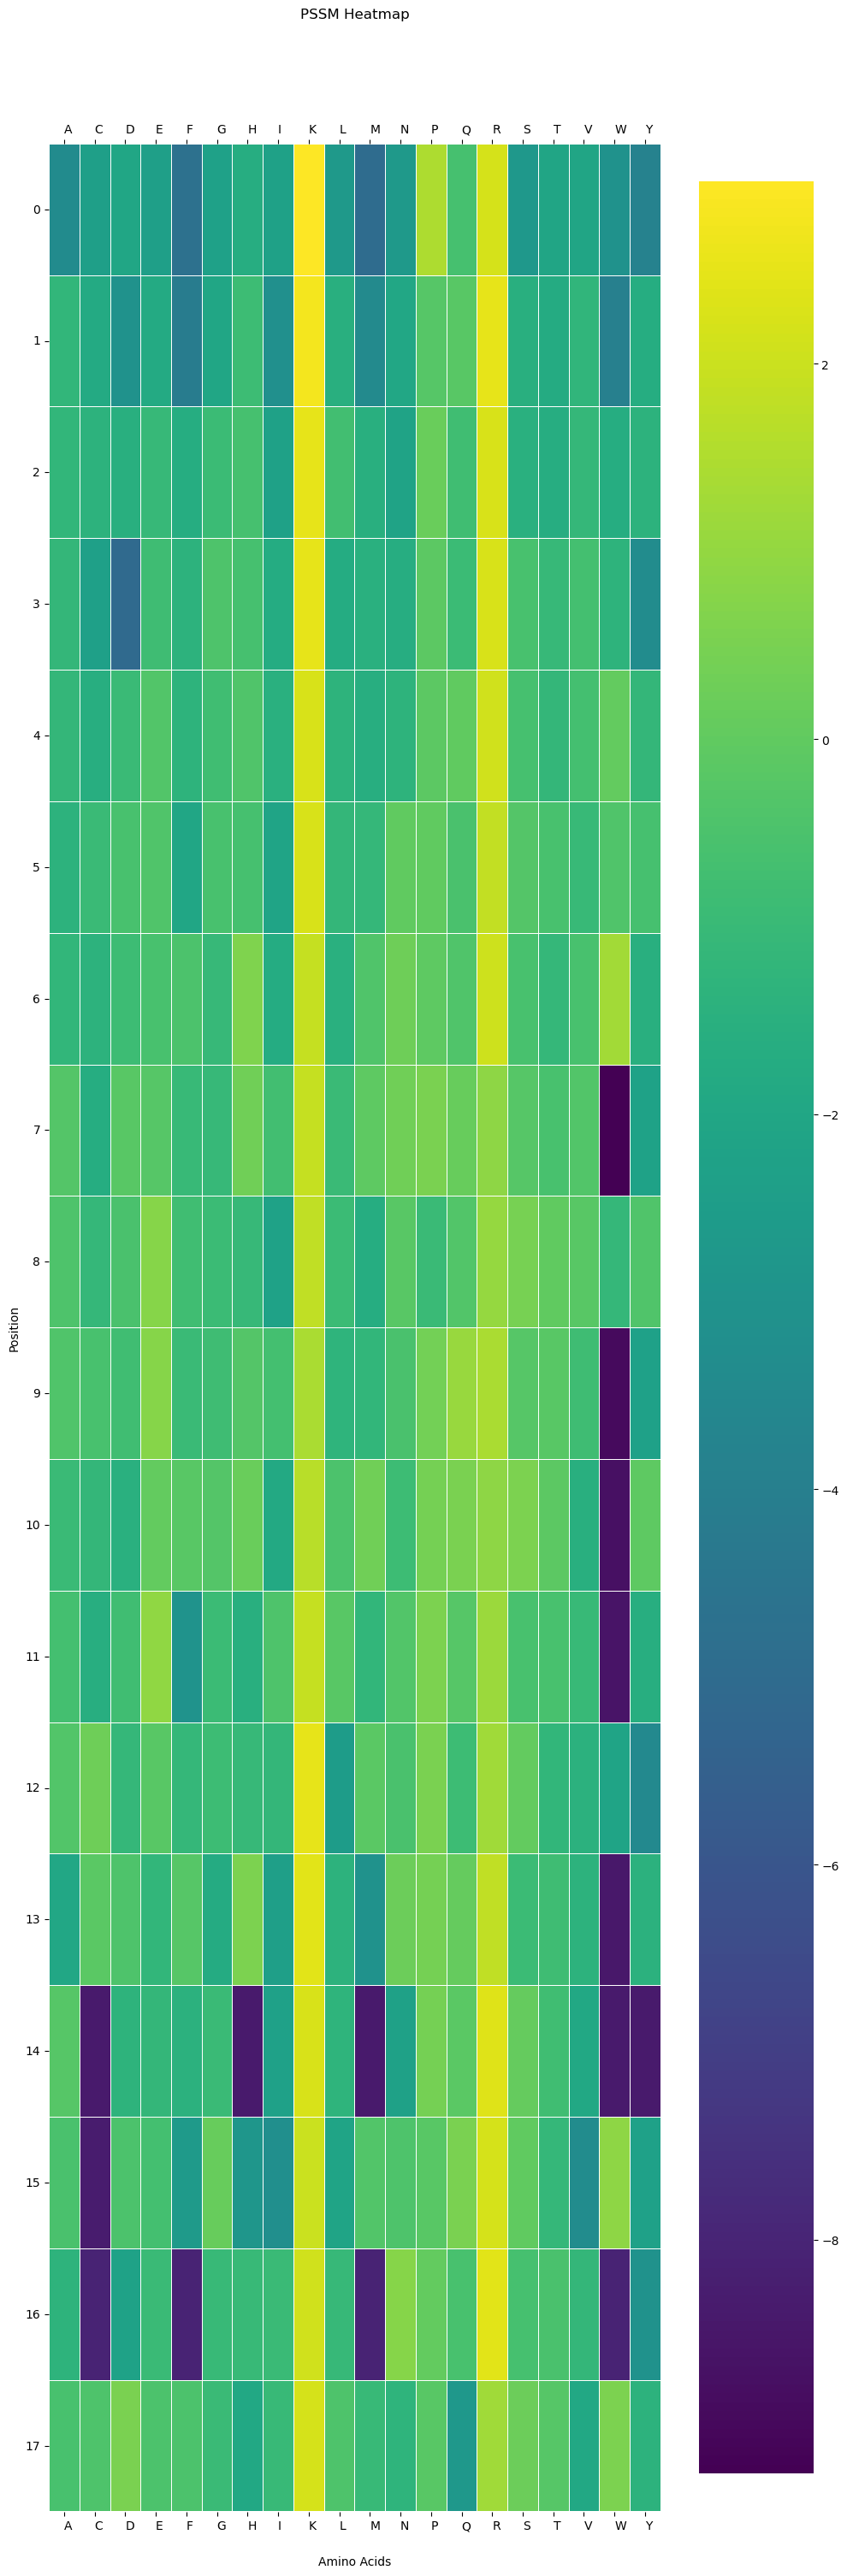

In [5]:
# Plot the heatmap of the pssm matrix
df_pssm = pd.DataFrame(pssm.matrix)

plot_heatmap(df_pssm,10,30)

In [6]:
# Pickle pssm
with open('../data/nls_pssm.pkl', 'wb') as f:
    pickle.dump(pssm, f)